In [98]:
#Loading the Inportant Libraries
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm


# Loading the Data Set and Checking For NULL Values

In [99]:
df=pd.read_csv("potability_of_water.csv")

In [100]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.61308,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.10644,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.57327,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.28445,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.36393,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


In [102]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.082265,196.390335,22074.335334,7.132987,333.393347,425.455702,14.229174,66.499518,3.967153,0.390318
std,1.486029,32.460633,8668.693908,1.573879,36.116271,80.266652,3.341429,16.067742,0.788480,0.487928
min,0.000000,47.432000,320.942611,0.530351,180.206746,201.619737,2.200000,0.738000,1.450000,0.000000
25%,6.262799,176.753500,15825.182570,6.140033,316.552791,363.974060,12.015868,56.329076,3.440753,0.000000
50%,7.080795,196.833001,21153.322830,7.135063,333.775777,420.828362,14.151538,66.396293,3.947138,0.000000
75%,7.873272,216.441171,27345.174290,8.104498,349.985243,480.715208,16.450990,77.182622,4.503661,1.000000
max,14.000000,317.338124,56351.396300,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [138]:
#Get the ranges of every Column
df.max() - df.min()

ph                    14.000000
Hardness             269.906124
Solids             56030.453689
Chloramines           12.513455
Sulfate              300.823896
Conductivity         551.722883
Organic_carbon        26.100000
Trihalomethanes      123.262000
Turbidity              5.289000
Potability             1.000000
dtype: float64

In [103]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:xlabel='Potability', ylabel='count'>

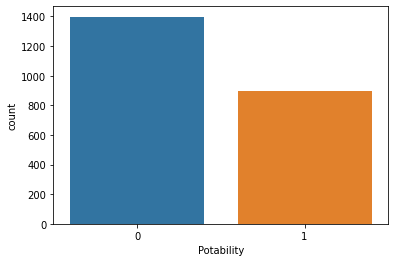

In [104]:
sns.countplot(x="Potability", data=df)


# Dividing the Data For Training, Validating and Testing


In [105]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=2)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2)

In [106]:
y_train = df_train['Potability']
y_val =df_val['Potability']
y_test =df_test['Potability']

In [107]:
del df_train['Potability']
del df_val['Potability']
del df_test['Potability']

In [108]:
df_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1632,9.314522,203.341650,23087.21766,6.437071,297.566764,373.044172,16.402773,79.163456,3.092940
414,6.300002,172.350281,40682.14400,4.242829,302.611858,485.672457,18.737931,64.808546,3.709437
1777,6.164480,189.058756,27312.16838,6.822157,319.951593,522.801399,13.502580,53.696202,4.834023
447,5.844674,147.179804,13615.10976,8.881112,394.658380,533.040210,14.217373,91.614031,4.338056
1894,7.080795,169.547411,20004.73363,6.437675,333.775777,349.865036,11.332518,41.703766,3.882004


# Feature Importance and Correlation

In [109]:
Feartures=df_train.columns

In [110]:
Feartures

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [111]:
#calculating the correlation
Corr=df_train.corr()


<ipython-input-112-f1af6b7a8582>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Feartures,rotation=45)
<ipython-input-112-f1af6b7a8582>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(Feartures,rotation=45)


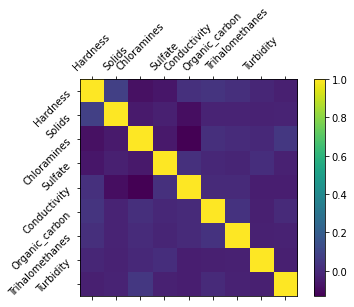

In [112]:

#Plotiing the Correlation 
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.]   
cax = ax.matshow(Corr)
fig.colorbar(cax)
ax.set_xticklabels(Feartures,rotation=45)
ax.set_yticklabels(Feartures,rotation=45)
plt.show()

In [113]:
#Doing Features Importance, Plotting the results 
Mutual_information=[]
for name in Feartures:
    x=mutual_info_score(df_train[name],y_train)
    Mutual_information.append(x)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\An

<ipython-input-114-f09e6416c739>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Feartures,rotation=45)


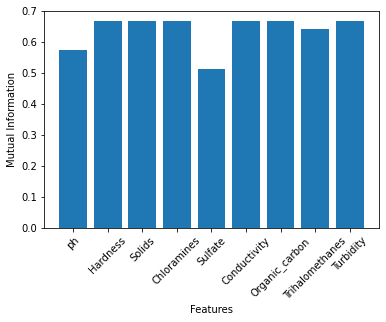

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.]   
cax = ax.bar(Feartures,Mutual_information)
ax.set_xticklabels(Feartures,rotation=45)
ax.set_xlabel("Features")
ax.set_ylabel("Mutual Information")

plt.show()

# Using a Dvictorizer for both Training and Validation Data

In [115]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Use Random Forest Model

In [116]:
number_of_trees=np.arange(10, 201, 10)
max_depth=np.arange(5,15,2)

In [117]:
scores = np.zeros((len(number_of_trees),len(max_depth)))

for i in range(len(max_depth)):
    for j  in range(len(number_of_trees)):
        rf = RandomForestClassifier(n_estimators=number_of_trees[j],max_depth=max_depth[i],random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        scores[j,i]= roc_auc_score(y_val, y_pred)
        print("for trees=",number_of_trees[j], " depth =", max_depth[i],"score=", scores[j,i])

        

for trees= 10  depth = 5 score= 0.5534326297100021
for trees= 20  depth = 5 score= 0.5680311698559875
for trees= 30  depth = 5 score= 0.5634346024856974
for trees= 40  depth = 5 score= 0.5480962714539356
for trees= 50  depth = 5 score= 0.5518149536397712
for trees= 60  depth = 5 score= 0.5618169264154665
for trees= 70  depth = 5 score= 0.5789800749654764
for trees= 80  depth = 5 score= 0.5672913789702111
for trees= 90  depth = 5 score= 0.5708719668573683
for trees= 100  depth = 5 score= 0.576346419412113
for trees= 110  depth = 5 score= 0.5691161964884592
for trees= 120  depth = 5 score= 0.5718188991911619
for trees= 130  depth = 5 score= 0.5645886762675084
for trees= 140  depth = 5 score= 0.5627638587492603
for trees= 150  depth = 5 score= 0.5636417439337147
for trees= 160  depth = 5 score= 0.5645886762675084
for trees= 170  depth = 5 score= 0.5672913789702111
for trees= 180  depth = 5 score= 0.5636417439337147
for trees= 190  depth = 5 score= 0.560939041231012
for trees= 200  depth =

# Draw the Validation Score  and get  the parameters with the highest score

<ipython-input-118-cdaae0581ee1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(max_depth,rotation=45)
<ipython-input-118-cdaae0581ee1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(number_of_trees,rotation=45)


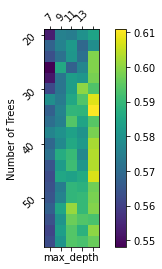

In [118]:
#Plotiing the Score
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[100,100.]
figuresize=[100.,100.]   
cax = ax.matshow(scores)
fig.colorbar(cax)
ax.set_xticklabels(max_depth,rotation=45)
ax.set_yticklabels(number_of_trees,rotation=45)
ax.set_xlabel("max_depth")
ax.set_ylabel("Number of Trees")

plt.show()

In [119]:
#Get the parameter with the highest score
indices=np.where(scores==np.max(scores))

In [123]:
print("The best number of trees is", number_of_trees[indices[0][0]])
print("The best max depth is", max_depth[indices[1][0]])
print("The score is",scores[indices[0][0],indices[1][0]])


The best number of trees is 80
The best max depth is 13
The score is 0.6107910830538568


In [124]:
optimal_trees=number_of_trees[indices[0][0]]
max_depth_optimal= max_depth[indices[1][0]]
rf = RandomForestClassifier(n_estimators=optimal_trees,max_depth=max_depth_optimal,random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=80, random_state=1)

# Use Logistic Regression

In [132]:
array_C=np.linspace(0.001,1000,1000)
score_logistic=[]

In [135]:
for i in range(len(array_C)):
    model = LogisticRegression(C=array_C[i], max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score_logistic.append( roc_auc_score(y_val, y_pred))
    

In [137]:
#get the value of C for the maximum score
indices=np.where(score_logistic==np.max(score_logistic))
print("The best value of C is", array_C[indices[0][0]])
print("The score is",score_logistic[indices[0][0]])

The best value of C is 0.001
The score is 0.5161471690668771


# By comparing the performance ofLogistic Regression and Random Forest on the Validation Data , it is clear that Random Forest better score than Logistic Regression, so I will deploy the Random Forest